In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.modeling.blackbody import blackbody_lambda, blackbody_nu
import math

%matplotlib notebook

In [3]:
G_ZP_Vega = 25.6883657251
GBp_ZP_Vega = 25.3513881707
GRp_ZP_Vega = 24.7619199882
        
G_ZP_AB = 25.7933969562
GBp_ZP_AB = 25.3805596387
GRp_ZP_AB = 25.1161276701
        
G_f0_AB = 10.**(0.4*G_ZP_AB)
GBp_f0_AB = 10.**(0.4*GBp_ZP_AB)
GRp_f0_AB = 10.**(0.4*GRp_ZP_AB)
        
G_Jy_per_photon = 3631./G_f0_AB
GBp_Jy_per_photon = 3631./GBp_f0_AB
GRp_Jy_per_photon = 3631./GRp_f0_AB
        
G_f0_Vega_photon = 10.**(0.4*G_ZP_Vega)
GBp_f0_Vega_photon = 10.**(0.4*GBp_ZP_Vega)
GRp_f0_Vega_photon = 10.**(0.4*GRp_ZP_Vega)
        
G_f0_vega = G_Jy_per_photon * G_f0_Vega_photon
GBp_f0_vega = GBp_Jy_per_photon * GBp_f0_Vega_photon
GRp_f0_vega = GRp_Jy_per_photon * GRp_f0_Vega_photon

In [4]:
def fluxdrive_plot(spectname, binsize):
    spec_X, spec_S, spec_dict = import_spectrum(spectname, binsize)
    return spec_X, spec_S, spec_dict

def import_spectrum(spectname, binsize):
    spect_Xlist = []
    spect_Slist = []
    spect_dict = {}
    
    with open(spectname) as f:
        spectfilelist = f.readlines()
        
    testline = spectfilelist[0]
    test_res = [pos for pos, char in enumerate(testline) if char == '-']
    line_start = testline.index('1')
    
    flag1 = False
    flag2 = False
    
    flag1 = (test_res[0] < (7 + line_start))
    flag2 = (test_res[1] > (20 + line_start))
    
    #print flag1, flag2
    
    for line in spectfilelist:
        if (flag1 and flag2):
            line_use = line[:13] + ' ' + line[13:25] + ' ' + line[25:]
        elif flag1:
            line_use = line[:13] + ' ' + line[13:25] + ' ' + line[25:]
        elif flag2:
            line_use = line[:25] + ' ' + line[25:]
        else:
            line_use = line
            
        datavec = line_use.split()
        xstr = datavec[0]
        sstr = datavec[1]
        sstr1 = sstr.replace('D','e')
        #print datavec
        #print sstr1
        
        x = float(xstr)
        s = float(sstr1)
        
        spect_Xlist.append(x)
        spect_Slist.append((10.**(s-8.)))
        spect_dict[x] = s
        
    spect_X_binned = []
    spect_S_binned = []
    
    #ents_per_bin = binsize*20.
    
    spect_X = np.array(spect_Xlist)
    spect_S = np.array(spect_Slist)
    
    return spect_X, spect_S, spect_dict

<IPython.core.display.Javascript object>


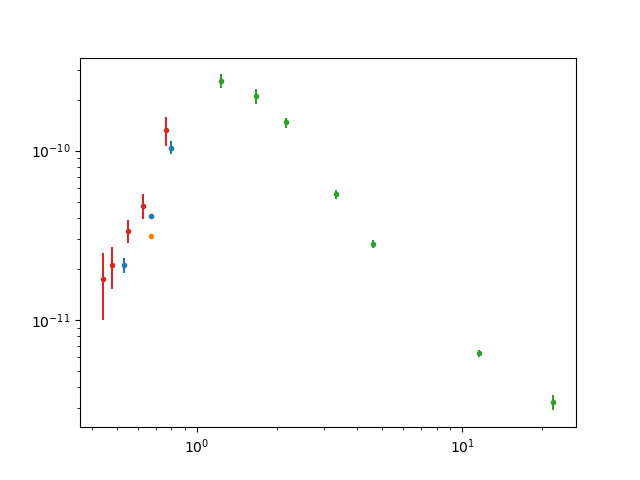

In [11]:
component_a_gaia_mags = np.array([13.8874,14.9381,12.4398])
component_b_gaia_mags = np.array([14.1849,None,None])

component_a_gaia_magerrs = np.array([0.0051,0.0352,0.0316])
component_b_gaia_magerrs = np.array([0.0017,None,None])

gaia_zps = np.array([G_f0_vega, GBp_f0_vega, GRp_f0_vega])

component_a_gaia_fluxes_vec = []
component_a_gaia_fluxerrs_vec = []
component_b_gaia_fluxes_vec = []
component_b_gaia_fluxerrs_vec = []

for i in range(3):
    if component_a_gaia_mags[i] == None:
        component_a_gaia_fluxes_vec.append(0.)
    else:
        component_a_gaia_fluxes_vec.append((gaia_zps[i]*10.**(-0.4*component_a_gaia_mags[i])))
        
    if component_a_gaia_magerrs[i] == None:
        component_a_gaia_fluxerrs_vec.append(0.)
    else:
        component_a_gaia_fluxerrs_vec.append(0.4*np.log(10.)*component_a_gaia_fluxes_vec[i]*component_a_gaia_magerrs[i])
        
    if component_b_gaia_mags[i] == None:
        component_b_gaia_fluxes_vec.append(0.)
    else:
        component_b_gaia_fluxes_vec.append((gaia_zps[i]*10.**(-0.4*component_b_gaia_mags[i])))
        
    if component_b_gaia_magerrs[i] == None:
        component_b_gaia_fluxerrs_vec.append(0.)
    else:
        component_b_gaia_fluxerrs_vec.append(0.4*np.log(10.)*component_b_gaia_fluxes_vec[i]*component_b_gaia_magerrs[i])
        
component_a_gaia_fluxes = np.array(component_a_gaia_fluxes_vec)
component_a_gaia_fluxerrs = np.array(component_a_gaia_fluxerrs_vec)
component_b_gaia_fluxes = np.array(component_b_gaia_fluxes_vec)
component_b_gaia_fluxerrs = np.array(component_b_gaia_fluxerrs_vec)


#component_a_gaia_fluxes = np.array([(gaia_zps[i]*10.**(-0.4*component_a_gaia_mags[i])) for i in range(3)])
#component_b_gaia_fluxes = np.array([(gaia_zps[i]*10.**(-0.4*component_b_gaia_mags[i])) for i in range(3)])

#component_a_gaia_fluxerrs = np.array([(0.4*np.log(10.)*component_a_gaia_fluxes[i]*component_a_gaia_magerrs[i]) for i in range(3)])
#component_b_gaia_fluxerrs = np.array([(0.4*np.log(10.)*component_b_gaia_fluxes[i]*component_b_gaia_magerrs[i]) for i in range(3)])

gaia_wavs_microns = np.array([0.673, 0.532, 0.797])
gaia_wavs_meters = gaia_wavs_microns * 1.e-6
gaia_wavs_Hz = 299792458./gaia_wavs_meters



component_a_gaia_nuFnu = gaia_wavs_Hz * component_a_gaia_fluxes * 1.0e-23
component_b_gaia_nuFnu = gaia_wavs_Hz * component_b_gaia_fluxes * 1.0e-23

component_a_gaia_nuFnuerrs = gaia_wavs_Hz * component_a_gaia_fluxerrs * 1.0e-23
component_b_gaia_nuFnuerrs = gaia_wavs_Hz * component_b_gaia_fluxerrs * 1.0e-23

combined_2mass_wise_mags_J0949 = np.array([10.437,9.858,9.500,9.248,9.005,7.780,6.360])
combined_2mass_wise_magerrs_J0949 = np.array([0.033,0.036,0.024,0.022,0.020,0.016,0.037])
ir_zps = np.array([1594., 1024., 666.7, 309.54, 171.787, 31.674, 8.363])

combined_2mass_wise_fluxes = np.array([(ir_zps[i] * 10.**(-0.4*combined_2mass_wise_mags_J0949[i])) for i in range(7)])
combined_2mass_wise_fluxerrs = np.array([(0.4*np.log(10.)*combined_2mass_wise_fluxes[i]*combined_2mass_wise_magerrs_J0949[i]) for i in range(7)])

ir_wavs_microns = np.array([1.235, 1.662, 2.159, 3.35, 4.60, 11.56, 22.08])
ir_wavs_meters = 1.0e-6 * ir_wavs_microns
ir_wavs_Hz = 299792458./ir_wavs_meters

combined_2mass_wise_nuFnu = ir_wavs_Hz * combined_2mass_wise_fluxes * 1.0e-23
combined_2mass_wise_nuFnuerrs = ir_wavs_Hz * combined_2mass_wise_fluxerrs * 1.0e-23

combined_apass_mags_J0949 = np.array([14.516,15.645,15.085,13.919,12.581])
combined_apass_magerrs_J0949 = np.array([0.054,0.155,0.101,0.062,0.070])

apass_zps = np.array([3953.,4646.,3631.,3631.,3631.])
apass_wavs_microns = np.array([0.5500,0.4400,0.4770,0.6231,0.7625])
apass_wavs_meters = 1.0e-6 * apass_wavs_microns
apass_wavs_Hz = 299792458./apass_wavs_meters
apass_fluxes = np.array([(apass_zps[i] * 10.**(-0.4*combined_apass_mags_J0949[i])) for i in range(5)])
apass_fluxerrs = np.array([(0.4*np.log(10.)*apass_fluxes[i]*combined_apass_magerrs_J0949[i]) for i in range(5)])

apass_nuFnu = apass_wavs_Hz * apass_fluxes * 1.0e-23
apass_nuFnuerrs = apass_wavs_Hz * apass_fluxerrs * 1.0e-23

plt.figure()
plt.errorbar(gaia_wavs_microns, component_a_gaia_nuFnu,yerr=3.*component_a_gaia_nuFnuerrs,fmt='.')
plt.errorbar(gaia_wavs_microns, component_b_gaia_nuFnu,yerr=3.*component_b_gaia_nuFnuerrs,fmt='.')
plt.errorbar(ir_wavs_microns, combined_2mass_wise_nuFnu,yerr=3.*combined_2mass_wise_nuFnuerrs,fmt='.')
plt.errorbar(apass_wavs_microns, apass_nuFnu, yerr=3.*apass_nuFnuerrs,fmt='.')
plt.xscale('log',nonposx='clip')
plt.yscale('log',nonposy='clip')
plt.show()



In [18]:
plotting_logx_vec = np.linspace(np.log10(0.25), np.log10(100.), 1001)
plotting_x_vec = np.zeros(1001)
    
for i in range(1001):
    plotting_x_vec[i] = 10.**(plotting_logx_vec[i])
    
plotting_xvec_angstroms = plotting_x_vec * 1.e4


teffpull1 = '0'+str(35)
loggpull1 = str(4.5)

teffpull2 = '028'
loggpull2 = str(4.5)
        
spect_file1 = '..\\..\\BTSettlstuff_use\\BT-Settl_M-0.0a+0.0\\lte'+teffpull1+'.0-'+loggpull1+'-0.0a+0.0.BT-Settl.spec.7'
spect_file2 = '..\\..\\BTSettlstuff_use\\BT-Settl_M-0.0a+0.0\\lte'+teffpull2+'.0-'+loggpull2+'-0.0a+0.0.BT-Settl.spec.7'


specX1, specS1, specdict1 = fluxdrive_plot(spect_file1, 1)
print 'specdict1 read in'
specX2, specS2, specdict2 = fluxdrive_plot(spect_file2, 1)
print 'specdict2 read in'

specdict1 read in
specdict2 read in


[  8.11238427e-12   3.94025811e-13  -1.02283910e-11]
[  2.57963106e-14   5.24404889e-12   7.69317404e-11]
Grid constructed


<IPython.core.display.Javascript object>


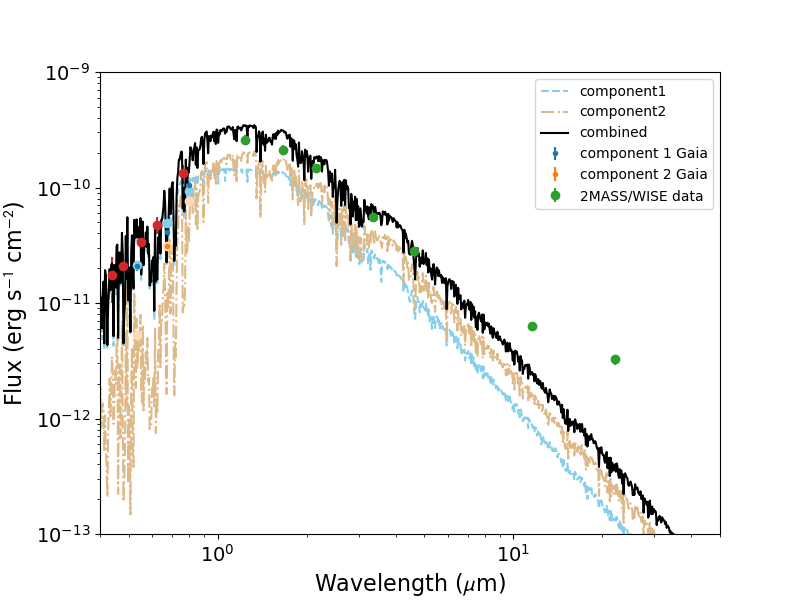

In [37]:
rdstar1 = 10.**(-49.2/5.)
rdstar2 = 10.**(-48.2/5.)

modelmags2 = np.array([-34.016,-31.751,-35.431]) - 5.*np.log10(rdstar2)
modelmags1 = np.array([-35.509,-34.282,-36.648]) - 5.*np.log10(rdstar1)

modelnuFnu1 = np.array([(gaia_zps[i]*10.**(-0.4*modelmags1[i])) for i in range(3)]) * gaia_wavs_Hz * (1.0e-23)
modelnuFnu2 = np.array([(gaia_zps[i]*10.**(-0.4*modelmags2[i])) for i in range(3)]) * gaia_wavs_Hz * (1.0e-23)

#print modelnuFnu1
#print modelnuFnu2

print modelnuFnu1 - component_a_gaia_nuFnu
print modelnuFnu2 - component_b_gaia_nuFnu


fluxspecS1 = specX1 * specS1 * (rdstar1**2)
fluxspecS2 = specX2 * specS2 * (rdstar2**2)

#combined_grid = np.array(sorted([x for x in specdict1.keys() if x in specdict2.keys()]))
print 'Grid constructed'

fluxspecS1_gridded = np.interp(plotting_xvec_angstroms, specX1, fluxspecS1)
fluxspecS2_gridded = np.interp(plotting_xvec_angstroms, specX2, fluxspecS2)
combined_fluxspec = fluxspecS1_gridded + fluxspecS2_gridded

specS1_gridded = fluxspecS1_gridded / plotting_xvec_angstroms
specS2_gridded = fluxspecS2_gridded / plotting_xvec_angstroms
combined_spec = specS1_gridded + specS2_gridded

plotting_xvec_microns = plotting_xvec_angstroms * 1.0e-4

plt.figure(figsize=(8.,6.))
plt.errorbar(gaia_wavs_microns, component_a_gaia_nuFnu,yerr=3.*component_a_gaia_nuFnuerrs,fmt='.',label='component 1 Gaia')
plt.errorbar(gaia_wavs_microns, component_b_gaia_nuFnu,yerr=3.*component_b_gaia_nuFnuerrs,fmt='.', label='component 2 Gaia')
plt.errorbar(ir_wavs_microns, combined_2mass_wise_nuFnu,yerr=3.*combined_2mass_wise_nuFnuerrs,fmt='o', label='2MASS/WISE data')
plt.errorbar(apass_wavs_microns, apass_nuFnu, yerr=3.*apass_nuFnuerrs,fmt='o')
plt.plot(plotting_xvec_microns, fluxspecS1_gridded,'skyblue',linestyle='--',label='component1')
plt.plot(plotting_xvec_microns, fluxspecS2_gridded,'burlywood',linestyle='-.',label='component2')
plt.plot(plotting_xvec_microns, combined_fluxspec,'k',label='combined')
plt.plot(gaia_wavs_microns, modelnuFnu1,'o',color='skyblue')
plt.plot(gaia_wavs_microns, modelnuFnu2, 'o',color='peachpuff')
plt.xscale('log',nonposx='clip')
plt.yscale('log',nonposy='clip')
plt.xlabel(r'Wavelength ($\mu$m)',fontsize=16)
plt.ylabel(r'Flux (erg s$^{-1}$ cm$^{-2}$)',fontsize=16)
plt.xlim([0.4, 50.])
plt.ylim([1.e-13, 1.e-9])
plt.legend(loc='upper right')
#plt.show()
plt.savefig('J0949_example_two_mdwarfs.pdf')

#plt.figure(figsize=(8.,6.))
#plt.errorbar(gaia_wavs_microns, component_a_gaia_nuFnu/(gaia_wavs_microns*10000.),yerr=3.*(component_a_gaia_nuFnuerrs/(gaia_wavs_microns*10000.)),fmt='o',label='component 1')
##plt.errorbar(gaia_wavs_microns, component_b_gaia_nuFnu/(gaia_wavs_microns*10000.),yerr=3.*(component_b_gaia_nuFnuerrs/(gaia_wavs_microns*10000.)),fmt='o', label='component 2')
#plt.errorbar(ir_wavs_microns, combined_2mass_wise_nuFnu/(ir_wavs_microns*10000.),yerr=3.*combined_2mass_wise_nuFnuerrs/(ir_wavs_microns*10000.),fmt='o', label='combined')
#plt.plot(plotting_xvec_microns, specS1_gridded,'skyblue',linestyle='--',label='component1')
#plt.plot(plotting_xvec_microns, specS2_gridded,'peachpuff',linestyle='-.',label='component2')
#plt.plot(plotting_xvec_microns, combined_spec,'k',label='combined')
#plt.xscale('log',nonposx='clip')
#plt.yscale('log',nonposy='clip')
#plt.xlabel(r'Wavelength ($\mu$m)',fontsize=16)
#plt.ylabel(r'Flux Density (erg s$^{-1}$ cm$^{-2}$)',fontsize=16)
#plt.xlim([0.4, 50.])
#plt.ylim([1.e-18, 1.e-13])
#plt.legend(loc='upper right')
#plt.show()

<IPython.core.display.Javascript object>


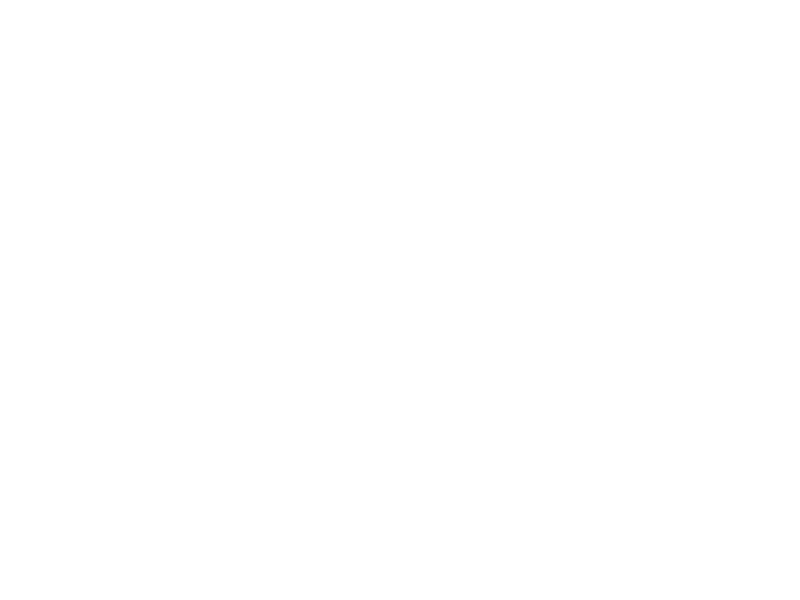

<IPython.core.display.Javascript object>


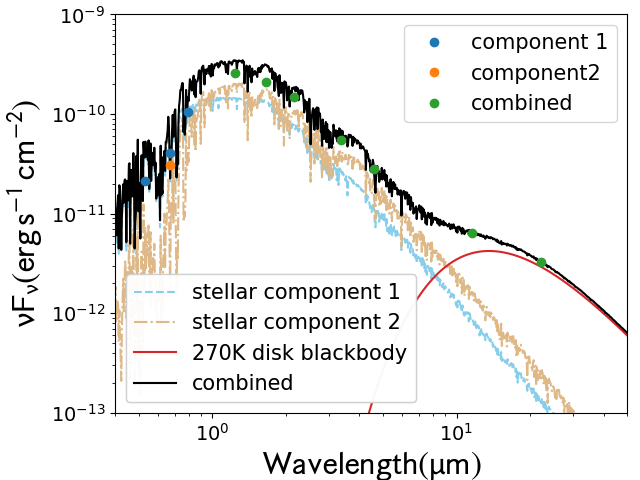

In [39]:
disk_blackbody = blackbody_lambda(plotting_xvec_angstroms, 270.)

disk_blackbody_nuFnu = disk_blackbody * plotting_xvec_angstroms * u.AA * np.pi * u.sr

#print disk_blackbody_nuFnu

xfactor = 1.9e-17

combined_fluxspec_final = combined_fluxspec + (xfactor * disk_blackbody_nuFnu * u.s * u.cm * u.cm / u.erg)

plt.figure(figsize=(8.,6.))

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
      


fig, axes = plt.subplots(1,1)
plt.gcf().subplots_adjust(left = 0.18)
plt.gcf().subplots_adjust(right=0.98)
plt.gcf().subplots_adjust(top=0.97)
plt.gcf().subplots_adjust(bottom=0.14)

axes.errorbar(gaia_wavs_microns, component_a_gaia_nuFnu,yerr=3.*component_a_gaia_nuFnuerrs,fmt='o',label='component 1')
axes.errorbar(gaia_wavs_microns, component_b_gaia_nuFnu,yerr=3.*component_b_gaia_nuFnuerrs,fmt='o', label='component 2')
axes.errorbar(ir_wavs_microns, combined_2mass_wise_nuFnu,yerr=3.*combined_2mass_wise_nuFnuerrs,fmt='o', label='combined')
axes.plot(plotting_xvec_microns, fluxspecS1_gridded,'skyblue',linestyle='--')
axes.plot(plotting_xvec_microns, fluxspecS2_gridded,'burlywood',linestyle='-.')
axes.plot(plotting_xvec_microns, disk_blackbody_nuFnu*xfactor)
axes.plot(plotting_xvec_microns, combined_fluxspec_final,'k')
#plt.plot(gaia_wavs_microns, modelnuFnu1,'o',color='skyblue')
#plt.plot(gaia_wavs_microns, modelnuFnu2, 'o',color='peachpuff')
axes.set_xscale('log',nonposx='clip')
axes.set_yscale('log',nonposy='clip')
axes.set_xlabel(r'$\mathrm{Wavelength(\mu m)}$', fontsize=24)
axes.set_ylabel(r'$\mathrm{\nu F_{\nu} (erg\,s^{-1}\,cm^{-2})}$', fontsize=24)
axes.set_xlim([0.4, 50.])
axes.set_ylim([1.e-13, 1.e-9])
lines = axes.get_lines()
legend=plt.legend(lines[0:3], ['component 1','component2','combined'],loc='upper right',fontsize=15)
legend1 = plt.legend([lines[i] for i in range(3,7)],['stellar component 1','stellar component 2','270K disk blackbody','combined'], loc='lower left', fontsize=15)
axes.add_artist(legend)
axes.add_artist(legend1)
#plt.show()
plt.savefig('AWI00063nx_two_component_model.pdf')